<a href="https://colab.research.google.com/github/NormaM22/ALG-IP/blob/main/Algoritmo_ALG_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from scipy.optimize import nnls
import matplotlib.pyplot as plt

In [14]:
# Matriz de transición A_T
A_T=np.array([[0.95,0.04,0,0],[0.05,0.85,0,0],[0,0.1,1,0],[0,0.01,0,1]])

print("A_T=",A_T)

A_T= [[0.95 0.04 0.   0.  ]
 [0.05 0.85 0.   0.  ]
 [0.   0.1  1.   0.  ]
 [0.   0.01 0.   1.  ]]


In [15]:
# Obtención de muestra sintética X a partir de A_T y del vector de estado inicial x1:
N=4;  # Número de elementos de la muestra X
x1=np.array([[1],[0],[0],[0]])  

X=np.zeros((N,4))              
X[0]=np.transpose(x1)
for i in range (N-1):
  X[i+1]=np.dot(A_T,X[i])
print("X=",X)
#print(X[:,0])

X= [[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [9.50000e-01 5.00000e-02 0.00000e+00 0.00000e+00]
 [9.04500e-01 9.00000e-02 5.00000e-03 5.00000e-04]
 [8.62875e-01 1.21725e-01 1.40000e-02 1.40000e-03]]


In [16]:
# Formación de matrices del sistema matricial X1_t=X0_t(A_t) :
X0_t=np.zeros((N-1,4))
for i in range (N-1):
  X0_t[i]=X[i]
print("X0_t=",X0_t)

X1_t=np.zeros((N-1,4))
for i in range (N-1):
  X1_t[i]=X[i+1]
print("X1_t=",X1_t)


X0_t= [[1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [9.500e-01 5.000e-02 0.000e+00 0.000e+00]
 [9.045e-01 9.000e-02 5.000e-03 5.000e-04]]
X1_t= [[9.50000e-01 5.00000e-02 0.00000e+00 0.00000e+00]
 [9.04500e-01 9.00000e-02 5.00000e-03 5.00000e-04]
 [8.62875e-01 1.21725e-01 1.40000e-02 1.40000e-03]]


In [17]:
# Mínimos cuadrados no negativos (NNLS):
A=np.zeros((4,4))  
r=np.zeros((4,1))
R=0
for i in range (4):
 nnls(X0_t, X1_t[:,i], maxiter=None)
 A[i,:]=nnls(X0_t, X1_t[:,i])[0]
 r[i,0]=nnls(X0_t, X1_t[:,i])[1]
 R=R+r[i,0]
print("Matriz de parámetros A=",A)
print("r=",r)
print("R=",R)

Matriz de parámetros A= [[0.95 0.04 0.   0.  ]
 [0.05 0.85 0.   0.  ]
 [0.   0.1  1.   0.  ]
 [0.   0.01 0.1  0.  ]]
r= [[8.32667268e-17]
 [0.00000000e+00]
 [3.90312782e-18]
 [1.35525272e-19]]
R= 8.730537993939524e-17


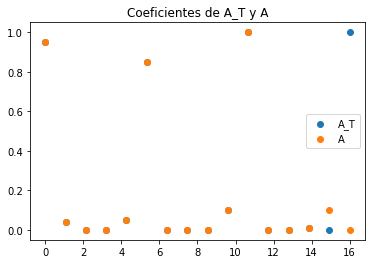

In [18]:
# Grafica de los coeficientes de A_T y A:
x=np.linspace(0,num=16,stop=16)
y=np.zeros((1,16))
y1=np.zeros((1,16))
for i in range (4):
 for j in range (4):
   if i==0: 
    y[0,j]=A_T[i,j]
    y1[0,j]=A[i,j]
   elif i==1:
    y[0,j+4]=A_T[i,j]
    y1[0,j+4]=A[i,j]
   elif i==2:
    y[0,j+8]=A_T[i,j]
    y1[0,j+8]=A[i,j]
   elif i==3:
    y[0,j+12]=A_T[i,j]
    y1[0,j+12]=A[i,j]
#print(y)
#print(y1)

fig, ax = plt.subplots()
ax.scatter(x, y,label='A_T')
ax.scatter(x,y1,label='A')
ax.legend(loc='center right')
plt.title('Coeficientes de A_T y A')
plt.show()